<figure> 
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Métodos ensamblados con mezla de datos: Bagging </center></span>

<figure> 
<center>
<img src="../Imagenes/Algerian_ensemble_Cairo_1932.jpg"  width="600" height="600" align="center"/>
<figcaption> Ensamble algeriano, Cairo, 1932</figcaption>
</center>
</figure>

Fuente <a href="https://commons.wikimedia.org/wiki/File:Algerian_ensemble_(Cairo_1932).jpg">AnonymousUnknown author</a>, Public domain, via Wikimedia Commons

## <span style="color:blue">Referencias</span>

1. [Breiman, Friedman, Olsen, Stone, Classification and Regression Trees, 1984](http://library.lol/main/26908B6EDA02CA4FAF25ADBF57A12B26)
1. [Kumar, A. and Jain, M., Ensemble learning for AI developers](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529)
1. [Alvaro Montenegro y Daniel Montenegro, Inteligencia Artificial y Aprendizaje Profundo, 2022](https://github.com/AprendizajeProfundo/Diplomado)


## <span style="color:blue">Autores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Daniel  Montenegro, Msc, dammontenegrore@unal.edu.co


## <span style="color:blue">Asesora de Medios y  Marketing</span>

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Métodos ensamblados](#Métodos-ensamblados)
* [Bosques Aleatorios](#Bosques-Aleatorios)
* [Muestreo usando sckit-learn](#Muestreo-usando-sckit-learn)
* [Bagging. Agregación bootstrap](#Bagging.-Agregación-bootstrap)
* [Metaestimador bagging de scikit-learn](#Metaestimador-bagging-de-scikit-learn)
* [Estimador individual frente a bagging: descomposición de sesgo-varianza](#Estimador-individual-frente-a-bagging:-descomposición-de-sesgo-varianza)

## <span style="color:blue">Introducción</span>

Charles Darwin descubrió esencialmente que las especies son menos vulnerables cuando tienen suficiente variedad genética. Es más probable que una especie se extinga si está expuesta solamente a un tipo de ambiente cerrado, cuando se producen cambios en el medio ambiente, por ejemplo causado por desastres naturales.

Por otro lado, especies que desarrollan una suficiente variedad genética, como consecuencia de estar expuestas a diferentes condiciones ambientales y de entorno, son más fuertes y resisten mejor los cambios ambientales o de entorno.

Traslademos estas ideas a la ciencia de datos. Cuando se entrena un modelo con todo el conjunto de datos, puede ocurrir que al colocar el modelo en producción, los nuevos datos no tengan la misma distribución de los datos de entrenamiento y el modelo deje de funcionar adecuadamente.

Las ideas en esta lección son: dividir los datos en distintos conjuntos y entrenar múltiples modelos sobre diferentes conjuntos de datos. las ventajas de aplicar estas ideas son:

* Al tener diferentes conjuntos de datos, las distribuciones de los datos de entrada cambian, así sea solamente un poco. Pero esto puede ser significativo, si por ejemplo, se pueden establecer patrones en los datos (grupos o clústers).
* Aplicar múltiples máquina de aprendizaje en una tarea rutinaria del científico de datos. La diferencia en este caso es que se aplican a diferentes conjuntos de datos, por lo que puede ocurrir que algunos modelos tengan mejores desempeños sobre subconjuntos de datos particulares.

Esta lección esta basada en [scikit-learn Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting) y [Kumar, A. and Jain, M., Ensemble learning for AI developers](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529).

## <span style="color:blue">Métodos ensamblados</span>

Según la definición del diccionario de Cambridge, un "ensemble" se refiere a un grupo de elementos o personas que actúan juntos como un conjunto. Inicialmente utilizado en el contexto de músicos que tocan juntos regularmente, este término se aplica también en el aprendizaje automático, donde el "ensemble learning" implica combinar diversas técnicas de aprendizaje automático para mejorar la precisión de los modelos. Estos métodos combinan las salidas de múltiples modelos de aprendizaje automático de formas interesantes, similar a cómo un conjunto de músicos combina sus actuaciones individuales de diversas maneras para crear una gran composición. Como científico de datos, tu rol es ser el líder de orquesta o arquitecto que aprovecha las fortalezas de los modelos de aprendizaje automático individuales y los combina creativamente para lograr un modelo de aprendizaje automático de primera categoría.

Para comprender mejor los beneficios de los métodos de conjunto, consideremos otra analogía. Imagina que deseas invertir en el mercado de valores. Te interesa una acción en particular, pero no estás seguro de su perspectiva futura, por lo que decides buscar consejo. Consultas a un asesor financiero que tiene una precisión del 75% en sus predicciones correctas. Decides también consultar a otros asesores financieros que te ofrecen consejos similares. En el caso en que todos los asesores te sugieren comprar la acción, ¿cuál es la tasa de precisión de este consejo colectivo?
Más a menudo que no, el consejo colectivo de varios expertos supera la precisión de cualquier asesor individual, especialmente en situaciones financieras variadas. De manera similar, en el aprendizaje automático, los métodos de conjunto de múltiples modelos de aprendizaje automático tienden a tener un mejor rendimiento generalizado que cualquier modelo individual, especialmente en condiciones o casos diversos o a largo plazo. En este libro, te guiaremos a través de formas de combinar la salida de múltiples modelos de aprendizaje automático bajo el concepto de aprendizaje en conjunto. Las técnicas de aprendizaje en conjunto pueden dividirse en tres clases principales: mezcla de datos de entrenamiento, mezcla de combinaciones y mezcla de modelos. Intentaremos brevemente aumentar tu comprensión de cada una de estas clases.

<figure> 
<center>
<img src="../Imagenes/datosentrenamientomezclados.png"  width="600" height="600" align="center"/>
<figcaption> Mezclando datos de entrenamiento mediante bagging</figcaption>
</center>
</figure>

[Fuente](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529): Kumar, A. & Jain, M. (2020). Mixing training data using bagging. Ensemble Learning for AI Developers. Página 2. Apress.

El objetivo de los métodos ensamblados es combinar las predicciones de varios estimadores base construidos con un algoritmo de aprendizaje dado para mejorar la generalización/robustez sobre un solo estimador.

Se suelen distinguir dos familias de métodos de conjunto:

En los métodos de promedio (**averging**), el principio fundamental es construir varios estimadores de forma independiente y luego promediar sus predicciones. En promedio, el estimador combinado suele ser mejor que cualquiera de los estimadores de base única porque se reduce su varianza.

Ejemplos: métodos de embolsado (**bagging**), bosques de árboles aleatorios (**ramdom forest**), ...

Por el contrario, en los métodos de impulso (**boosting**), los estimadores base se construyen secuencialmente y se intenta reducir el sesgo del estimador combinado. La motivación es combinar varios modelos débiles para producir un conjunto poderoso.

## <span style="color:blue">Bosques Aleatorios</span>

<figure> 
<center>
<img src="../Imagenes/randomforest.png"  width="500" height="500" align="center"/>
<figcaption>Bosque aleatorio de clasificación</figcaption>
</center>
</figure>

Hay grandes problemas con el uso de árboles de decisión. Obtener precisión suficiente para un conjunto de datos, necesita tener un árbol con mayor profundidad , pero a medida que aumenta la profundidad del árbol, comienza a enfrentarse a sobreajuste, lo que conduce a una menor precisión en el conjunto de datos de prueba.


Así que es mejor aceptar  una decisión menos precisa y menos profunda árbol  y no un árbol sobreajustado con más profundidad.

Una de las razones de este problema es que las variables utilizadas en la toma de decisiones puede no ser lo suficientemente discriminatorias.

Una forma de resolver este problema es tener múltiples árboles de decisión.
en lugar de uno. Cada árbol de decisión debe tener un conjunto diferente de variables 
o un subconjunto de datos de entrenamiento. Entonces, la salida de los árboles de decisión es combinado en un bosque aleatorio.

Como sugiere su nombre, un bosque aleatorio consiste en una colección de árboles de decisión, con cada árbol entrenado en un conjunto diferente de datos de entrenamiento.

El fundamento matemático detrás de los Random Forests se basa en dos conceptos principales: el muestreo con reemplazo (bootstrap) y la aleatorización de características (feature randomization).

1. **Muestreo con reemplazo (Bootstrap):**

El muestreo con reemplazo es fundamental para la construcción de múltiples árboles en un Random Forest. Para entender mejor este concepto, consideremos que tenemos un conjunto de datos de entrenamiento original con $N$ observaciones. Queremos crear un conjunto de datos bootstrap, denotado como $D_b$, para entrenar un árbol. Aquí está la idea matemática detrás de esto:

- En cada iteración del muestreo bootstrap, seleccionamos N observaciones del conjunto de datos original, pero lo hacemos con reemplazo. Esto significa que una observación en el conjunto de datos original puede aparecer varias veces en $D_b$, o incluso puede que no aparezca en absoluto.

- La probabilidad de que una observación en particular esté en $D_b$ se puede expresar como $1 - \frac{1}{N}$. Esto se debe a que, en cada selección, hay una probabilidad de $\frac{1}{N})$ de que no se seleccione una observación específica (ya que hay $N$ observaciones en total).

- Para $D_b$, podemos calcular la probabilidad de que una observación en particular **no** esté en $D_b$ en una sola iteración como $\frac{1}{N}$.

- Si hacemos $k$ iteraciones del muestreo bootstrap, la probabilidad de que una observación específica **no** esté en ninguna de las iteraciones es $\left(1 - \frac{1}{N}\right)^k$.

- A medida que $k$ crece, esta probabilidad tiende a disminuir, lo que significa que, en promedio, la mayoría de las observaciones estarán presentes en el conjunto de datos bootstrap.

2. **Aleatorización de características (Feature Randomization):**

En cada nodo durante la construcción de un árbol de decisión en un Random Forest, se lleva a cabo la aleatorización de características. Esto significa que en lugar de considerar todas las características disponibles para encontrar la mejor división, se selecciona un subconjunto aleatorio de características para realizar la evaluación. La elección de este subconjunto es aleatoria y controlada por un hiperparámetro llamado `max_features`.

- Supongamos que tenemos un conjunto de datos con $M$ características. Para cada división de nodo, seleccionamos un subconjunto de m características, donde m es una fracción de $M$ determinada por `max_features`.

- La probabilidad de seleccionar una característica específica para este subconjunto se puede expresar como $\frac{1}{M}$. Esto asegura que cada característica tenga una probabilidad igual de ser seleccionada en cada división.

- La aleatorización de características garantiza que los árboles en el Random Forest no solo sean diferentes debido al muestreo bootstrap, sino también porque cada árbol se construye considerando diferentes subconjuntos de características.

Este fundamento se basa en la combinación de muestreo con reemplazo y aleatorización de características para construir árboles de decisión decorrelacionados. Esto conduce a un ensamble de árboles que reduce la varianza y mejora la generalización en comparación con un solo árbol de decisión, lo que lo convierte en una herramienta poderosa en aprendizaje automático y ciencia de datos.

El siguiente código construye  un bosque aleatorio en Python scikit-learn, con el conjunto de datos iris. Tomado del ejemplo en [Kumar, A. and Jain, M., Ensemble learning for AI developers](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529).

In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
train_X, test_X, train_Y, test_Y = train_test_split(X, y,
                    test_size = 0.1, random_state = 123)

forest = RandomForestClassifier(n_estimators=8)
forest = forest.fit(train_X, train_Y)
print('score: ', forest.score(test_X, test_Y))

rf_output = forest.predict(test_X)
print('predicciones: ', rf_output)

score:  0.8666666666666667
predicciones:  [2 2 2 1 0 1 1 0 0 1 2 0 1 2 2]


Un bosque aleatorio de un conjunto de árboles de decisión ofrece lo mejor de ambos
mundos: mejor precisión con árboles de decisión menos profundos y menos posibilidades de
sobreajuste. 

Un bosque aleatorio es un ejemplo de conjuntosun ensamble de árboles de decisión. Tomamos
un solo modelo de aprendizaje automático (un árbol de decisiones) y lo entrenamos con una combinación de diferentes datos de entrenamiento y parámetros para hacer un modelo ensamblado.

En este código seleccionará el primer árbol del bosque aleatorio y generará una representación gráfica del árbol en formato DOT. Luego, se crea un gráfico a partir de ese archivo DOT y se muestra en tu visor de gráficos predeterminado.

Si se desea visualizar otro árbol del bosque, se puede cambiar el índice en `forest.estimators_[i]` para seleccionar el árbol deseado.

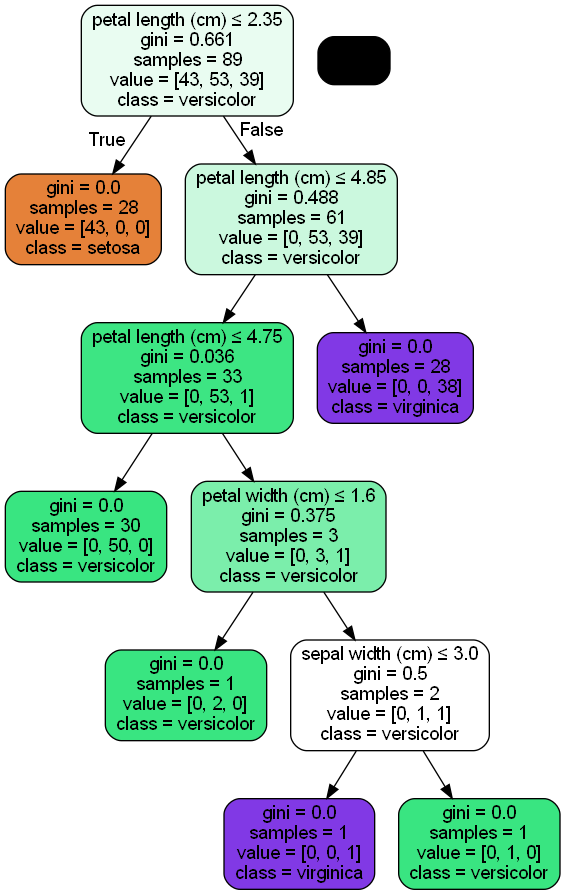

In [6]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

tree = forest.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, 
                feature_names=load_iris().feature_names,  
                class_names=load_iris().target_names,  
                filled=True, rounded=True,  
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

El módulo [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) incluye dos algoritmos de promediación basados en [árboles de decisión](https://scikit-learn.org/stable/modules/tree.html#tree) aleatorios: el algoritmo RandomForest y el método Extra-Trees. Ambos algoritmos son técnicas de perturbación y combinación [B1998](https://scikit-learn.org/stable/modules/ensemble.html#b1998) diseñadas específicamente para árboles. Esto significa que se crea un conjunto diverso de clasificadores introduciendo aleatoriedad en la construcción del clasificador. La predicción del conjunto se da como la predicción promediada de los clasificadores individuales.

En los bosques aleatorios ([RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) y [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)), cada árbol del conjunto se construye a partir de una muestra tomada con reemplazo (es decir, una muestra bootstrap) del conjunto de entrenamiento.

Además, al dividir cada nodo durante la construcción de un árbol, se encuentra la mejor división ya sea a partir de todas las características de entrada o de un subconjunto aleatorio de tamaño max_features. [AJuste de hiperparámetros](https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters)

El propósito de estas dos fuentes de aleatoriedad es reducir la varianza del estimador del bosque. De hecho, los árboles de decisión individuales suelen mostrar una alta varianza y tienden a sobreajustarse. La aleatoriedad inyectada en los bosques produce árboles de decisión con errores de predicción algo desacoplados. Al promediar esas predicciones, algunos errores pueden cancelarse mutuamente. Los bosques aleatorios logran una reducción de la varianza al combinar árboles diversos, a veces a expensas de un ligero aumento en el sesgo. En la práctica, la reducción de la varianza a menudo es significativa, lo que resulta en un modelo global mejor.

En contraste con la publicación original, la implementación de scikit-learn combina los clasificadores promediando sus predicciones probabilísticas en lugar de permitir que cada clasificador vote por una sola clase.

Una alternativa competitiva a los bosques aleatorios son los modelos de [aumento de gradiente basados en histogramas (HGBT)](https://scikit-learn.org/stable/modules/ensemble.html#histogram-based-gradient-boosting):

- Construcción de árboles: Los bosques aleatorios suelen depender de árboles profundos (que sobreajustan individualmente), lo que requiere muchos recursos computacionales, ya que requieren varias divisiones y evaluaciones de divisiones candidatas. Los modelos de aumento construyen árboles poco profundos (que subajustan individualmente), que son más rápidos de ajustar y predecir.

- Aumento secuencial: En HGBT, los árboles de decisión se construyen de manera secuencial, donde cada árbol se entrena para corregir los errores cometidos por los anteriores. Esto les permite mejorar iterativamente el rendimiento del modelo utilizando relativamente pocos árboles. En contraste, los bosques aleatorios utilizan una votación mayoritaria para predecir el resultado, lo que puede requerir un mayor número de árboles para lograr el mismo nivel de precisión.

- Binning eficiente: HGBT utiliza un algoritmo de agrupación eficiente que puede manejar conjuntos de datos grandes con un alto número de características. El algoritmo de agrupación puede preprocesar los datos para acelerar la construcción posterior del árbol ([Por qué es más rápido](https://scikit-learn.org/stable/modules/ensemble.html#why-it-s-faster)). En contraste, la implementación de scikit-learn de los bosques aleatorios no utiliza agrupación y se basa en divisiones exactas, lo que puede ser computacionalmente costoso.

En general, el costo computacional de HGBT versus RF depende de las características específicas del conjunto de datos y la tarea de modelado. Siempre es una buena idea probar ambos modelos y comparar su rendimiento y eficiencia computacional en su problema específico para determinar cuál es el mejor ajuste.

### <span style="color:#4CC9F0">Árboles Extremadamente Aleatorizados </span>

En los árboles extremadamente aleatorizados ([ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) y [ExtraTreesRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor)), la aleatoriedad va un paso más allá en la forma en que se calculan las divisiones. Al igual que en los bosques aleatorios, se utiliza un subconjunto aleatorio de características candidatas, pero en lugar de buscar los umbrales más discriminativos, los umbrales se eligen al azar para cada característica candidata y se selecciona el mejor de estos umbrales generados al azar como regla de división. Esto generalmente permite reducir un poco más la varianza del modelo, a expensas de un ligero aumento en el sesgo:

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
                  random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
                             random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
                             min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
                           min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True

### <span style="color:#4CC9F0">Parámetros</span>

Los principales parámetros para ajustar al utilizar estos métodos son n_estimators y max_features. El primero es el número de árboles en el bosque. Cuanto mayor sea, mejor, pero también llevará más tiempo calcularlo. Además, tenga en cuenta que los resultados dejarán de mejorar significativamente más allá de un número crítico de árboles. El segundo es el tamaño de los subconjuntos aleatorios de características a considerar al dividir un nodo. Cuanto menor sea, mayor será la reducción de la varianza, pero también mayor será el aumento del sesgo. Los valores predeterminados empíricos recomendados son max_features=1.0 o equivalente max_features=None (siempre considerando todas las características en lugar de un subconjunto aleatorio) para problemas de regresión, y max_features="sqrt" (usando un subconjunto aleatorio de tamaño sqrt(n_features)) para tareas de clasificación (donde n_features es el número de características en los datos). El valor predeterminado de max_features=1.0 es equivalente a árboles ensacados, y se puede lograr más aleatoriedad configurando valores más pequeños (por ejemplo, 0.3 es un valor típico en la literatura). A menudo se obtienen buenos resultados al configurar max_depth=None en combinación con min_samples_split=2 (es decir, cuando se desarrollan completamente los árboles). Sin embargo, tenga en cuenta que estos valores generalmente no son óptimos y pueden dar lugar a modelos que consumen mucha memoria RAM. Siempre se deben validar cruzadamente los mejores valores de los parámetros. Además, tenga en cuenta que en los bosques aleatorios, se utilizan muestras bootstrap de forma predeterminada (bootstrap=True), mientras que la estrategia predeterminada para extra-trees es utilizar todo el conjunto de datos (bootstrap=False). Al utilizar el muestreo bootstrap, el error de generalización se puede estimar en las muestras excluidas o fuera de la bolsa (out-of-bag samples). Esto se puede habilitar configurando oob_score=True.

**Nota**

El tamaño del modelo con los parámetros predeterminados es $O( M * N * log (N) )$, donde $M$ es el número de árboles y $N$ es el número de muestras. Para reducir el tamaño del modelo, puede cambiar estos parámetros: min_samples_split, max_leaf_nodes, max_depth y min_samples_leaf.

### <span style="color:#4CC9F0">Paralelización</span>

Este módulo también ofrece la construcción en paralelo de los árboles y el cálculo paralelo de las predicciones a través del parámetro n_jobs. Si n_jobs = k, entonces los cálculos se dividen en k trabajos y se ejecutan en k núcleos de la máquina. Si n_jobs = -1, entonces se utilizan todos los núcleos disponibles en la máquina. Tenga en cuenta que debido a la sobrecarga de comunicación entre procesos, la aceleración podría no ser lineal (es decir, usar k trabajos lamentablemente no será k veces más rápido). Sin embargo, aún se puede lograr una aceleración significativa al construir un gran número de árboles o cuando construir un solo árbol requiere una cantidad considerable de tiempo (por ejemplo, en conjuntos de datos grandes).

### <span style="color:#4CC9F0">Ejemplos y comparaciones</span>

Importancia de los píxeles con un bosque paralelo de árboles

Este ejemplo muestra el uso de un bosque de árboles para evaluar la importancia basada en la impureza de los píxeles en una tarea de clasificación de imágenes en el conjunto de datos de caras. Cuanto más caliente sea el píxel, más importante es.

El código a continuación también ilustra cómo se puede paralelizar la construcción y el cálculo de las predicciones en múltiples jobs.

**Carga de datos y ajuste del modelo**

En primer lugar, cargamos el conjunto de datos de caras de Olivetti y limitamos el conjunto de datos para contener solo las primeras cinco clases. Luego entrenamos un bosque aleatorio en el conjunto de datos y evaluamos la importancia de las características basada en la impureza. Una desventaja de este método es que no se puede evaluar en un conjunto de prueba separado. Para este ejemplo, estamos interesados en representar la información aprendida del conjunto de datos completo. Además, configuraremos el número de núcleos a utilizar para las tareas.

In [4]:
from sklearn.datasets import fetch_olivetti_faces

Seleccionamos el número de núcleos a utilizar para realizar el ajuste en paralelo del modelo de bosque. El valor -1 significa utilizar todos los núcleos disponibles.

In [5]:
n_jobs = -1

Cargue el conjunto de datos de caras

In [6]:
data = fetch_olivetti_faces()
X, y = data.data, data.target

Limite a 5 el dataset de clases

In [7]:
mask = y < 5
X = X[mask]
y = y[mask]

Se ajustará un clasificador de bosque aleatorio para calcular las importancias de las características.

In [8]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=750, n_jobs=n_jobs, random_state=42)

forest.fit(X, y)

RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)

**Importancia de las características basada en la disminución promedio de la impureza (MDI)**

Las importancias de las características se proporcionan a través del atributo ajustado feature_importances_ y se calculan como la media y la desviación estándar de la acumulación de la disminución de la impureza dentro de cada árbol.

**Advertencia**

Las importancias de las características basadas en la impureza pueden ser engañosas para las características de alta cardinalidad (muchos valores únicos). Consulte la Importancia de características por permutación como una alternativa.

Tiempo transcurrido para calcular las importancias: 0.237 segundos


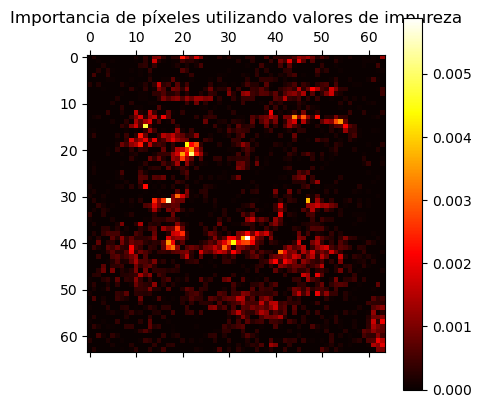

In [10]:
import time

import matplotlib.pyplot as plt

tiempo_inicio = time.time()
forma_imagen = data.images[0].shape
importancias = forest.feature_importances_
tiempo_transcurrido = time.time() - tiempo_inicio

print(f"Tiempo transcurrido para calcular las importancias: {tiempo_transcurrido:.3f} segundos")
importancias_reshape = importancias.reshape(forma_imagen)
plt.matshow(importancias_reshape, cmap=plt.cm.hot)
plt.title("Importancia de píxeles utilizando valores de impureza")
plt.colorbar()
plt.show()


¿Todavía puedes reconocer una cara?

Las limitaciones de MDI no son un problema para este conjunto de datos porque:

- Todas las características son numéricas (ordenadas) y, por lo tanto, no sufrirán el sesgo de la cardinalidad.

- Solo estamos interesados en representar el conocimiento adquirido del bosque en el conjunto de entrenamiento.

Si no se cumplen estas dos condiciones, se recomienda utilizar en su lugar la [importancia por permutación](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance).

Este código realiza la "completación de rostros" utilizando varios modelos de aprendizaje automático. La razón detrás de este proceso es comprender cómo diferentes modelos pueden predecir y completar la mitad inferior de las caras humanas basándose en la mitad superior proporcionada. Se utiliza un conjunto de datos de caras ("Olivetti Faces") y se entrenan modelos de regresión, como "Extra Trees", "K-nn", "Linear regression" y "Ridge", en la mitad superior de las caras. Luego, se muestra visualmente cómo cada modelo completa la mitad inferior de las caras para evaluar su rendimiento en la tarea de completación de imágenes. Esto ayuda a los científicos de datos y los investigadores a comprender las capacidades y limitaciones de diferentes modelos de aprendizaje automático en aplicaciones de visión por computadora.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\anroj\scikit_learn_data


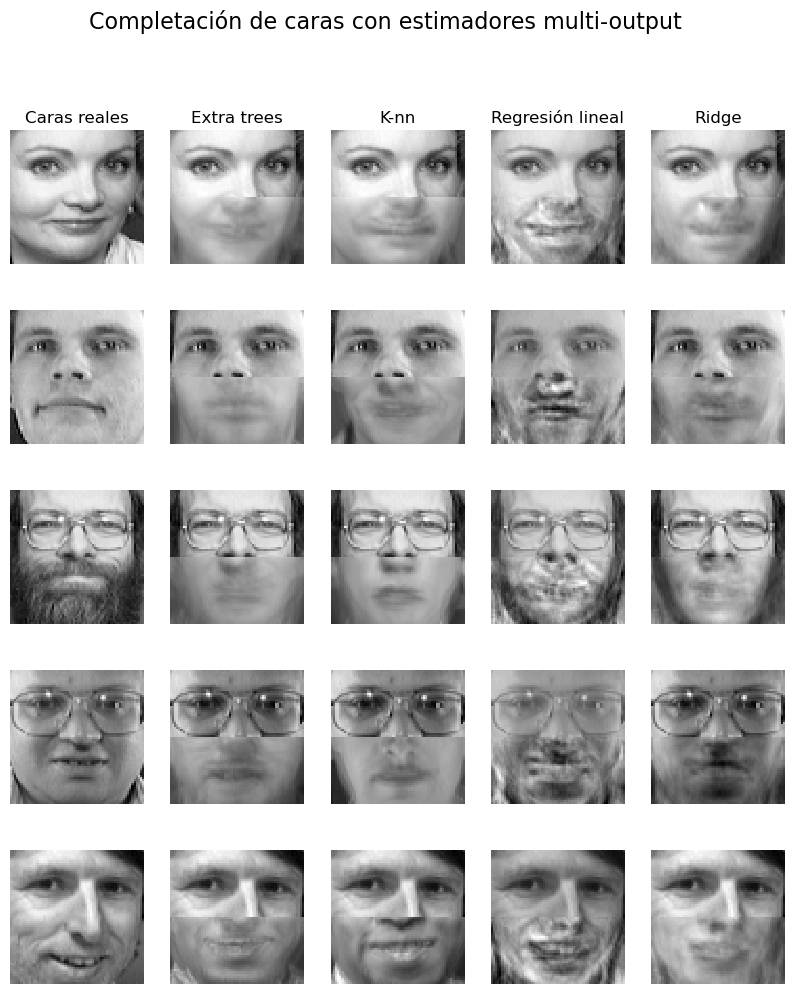

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state

# Cargar el conjunto de datos de caras
data, targets = fetch_olivetti_faces(return_X_y=True)

# Separar datos de entrenamiento y prueba
train = data[targets < 30]
test = data[targets >= 30]  # Pruebas en personas independientes

# Realizar pruebas en un subconjunto de personas
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Mitad superior de las caras
X_train = train[:, : (n_pixels + 1) // 2]
# Mitad inferior de las caras
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Ajustar estimadores
ESTIMADORES = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Regresión lineal": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for nombre, estimador in ESTIMADORES.items():
    estimador.fit(X_train, y_train)
    y_test_predict[nombre] = estimador.predict(X_test)

# Graficar las caras completadas
forma_imagen = (64, 64)

n_columnas = 1 + len(ESTIMADORES)
plt.figure(figsize=(2.0 * n_columnas, 2.26 * n_faces))
plt.suptitle("Completación de caras con estimadores multi-output", size=16)

for i in range(n_faces):
    cara_real = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_columnas, i * n_columnas + 1)
    else:
        sub = plt.subplot(n_faces, n_columnas, i * n_columnas + 1, title="Caras reales")

    sub.axis("off")
    sub.imshow(
        cara_real.reshape(forma_imagen), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMADORES)):
        cara_completada = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_columnas, i * n_columnas + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_columnas, i * n_columnas + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            cara_completada.reshape(forma_imagen),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

**Graficar las superficies de decisión de conjuntos de árboles en el conjunto de datos iris**

Esta gráfica compara las superficies de decisión aprendidas por un clasificador de árbol de decisión (primera columna), por un clasificador de bosque aleatorio (segunda columna), por un clasificador de árboles extras (tercera columna) y por un clasificador AdaBoost (cuarta columna).

En la primera fila, los clasificadores se construyen utilizando solo las características del ancho del sépalo y la longitud del sépalo, en la segunda fila utilizando solo la longitud del pétalo y la longitud del sépalo, y en la tercera fila utilizando solo el ancho del pétalo y la longitud del pétalo.

En orden descendente de calidad, cuando se entrenan (fuera de este ejemplo) utilizando las 4 características con 30 estimadores y se evalúan utilizando validación cruzada de 10 pliegues, vemos:

- ExtraTreesClassifier()  # puntaje 0.95
- RandomForestClassifier()  # puntaje 0.94
- AdaBoost(DecisionTree(max_depth=3))  # puntaje 0.94
- DecisionTree(max_depth=None)  # puntaje 0.94

Vale la pena señalar que RandomForests y ExtraTrees pueden ajustarse en paralelo en muchos núcleos, ya que cada árbol se construye de manera independiente de los demás. Las muestras de AdaBoost se construyen secuencialmente y no utilizan múltiples núcleos. Clasificadores en subconjuntos de características del conjunto de datos Iris, DecisionTree, RandomForest, ExtraTrees, AdaBoost.

<figure> 
<center>
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_forest_iris_001.png"  width="600" height="600" align="center"/>
<figcaption> Clasificadores en subconjuntos de características del conjunto de datos iris</figcaption>
</center>
</figure>

Fuente: [Scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html#sphx-glr-auto-examples-ensemble-plot-forest-iris-py) 

## <span style="color:blue">Muestreo usando sckit-learn</span>

Para lo que sigue necesitaremos construir muestras de  los datos.

El muestreo sin reemplazo es una técnica estadística utilizada para seleccionar una muestra de elementos de un conjunto de datos sin permitir que un elemento se seleccione más de una vez. En otras palabras, una vez que un elemento ha sido seleccionado para la muestra, se elimina del conjunto de datos, lo que garantiza que no se repita en la misma muestra. Este enfoque es comúnmente utilizado en estadísticas y análisis de datos para obtener muestras representativas de un conjunto de datos sin duplicaciones.

### <span style="color:#4CC9F0">Muestreo sin reemplazo </span>

Este código utiliza Python y la biblioteca `scikit-learn` para realizar dos muestras sin reemplazo a partir de una lista de datos `[1, 2, 3, 4, 5, 6, 7, 8, 9]`, donde cada muestra contiene 5 elementos seleccionados aleatoriamente, asegurando que no haya duplicados en cada muestra, y luego imprime las dos muestras resultantes.

In [4]:
from sklearn.utils import resample
import numpy as np

# Semilla para repetitibilidad
np.random.seed(123)

# datos para ser muestreados
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Numero  de divisionss 
num_divisions = 2
list_of_data_divisions = []

for x in range(0, num_divisions):
    sample = resample(data, replace=False, n_samples=5)
    list_of_data_divisions.append(sample)

print('Muestras: ', list_of_data_divisions)

Muestras:  [[8, 1, 6, 7, 4], [4, 6, 5, 3, 8]]


<figure> 
<center>
<img src="../Imagenes/muestreosinreemplazo.png"  width="500" height="500" align="center"/>
<figcaption> Muestreo sin reemplazo</figcaption>
</center>
</figure>

### <span style="color:#4CC9F0">Muestreo con reemplazo </span>

El muestreo con reemplazo es una técnica estadística utilizada para seleccionar elementos de una población con la posibilidad de que un elemento seleccionado sea devuelto y vuelva a estar disponible para su selección en futuras muestras. En este proceso, cada elemento de la población tiene una probabilidad constante de ser elegido en cada selección, lo que significa que es posible que un mismo elemento sea seleccionado más de una vez en una muestra particular. Este enfoque es útil en investigaciones y análisis estadísticos donde se necesita simular la variabilidad inherente de la población, y puede proporcionar estimaciones más precisas de parámetros y propiedades poblacionales..

Este código utiliza la biblioteca `scikit-learn` y `numpy` para realizar el muestreo con reemplazo en un conjunto de datos de números del 1 al 9, dividiéndolo en tres divisiones, cada una con 4 elementos seleccionados al azar permitiendo duplicados, y luego muestra las divisiones resultantes en la salida.

In [1]:
from sklearn.utils import resample
import numpy as np

# Semilla para repetitibilidad
np.random.seed(123)

# datos para ser muestreados
data = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Numero  de divisionss 
num_divisions = 3
list_of_data_divisions = []

for x in range(0, num_divisions):
    sample = resample(data, replace=True, n_samples=4)
    list_of_data_divisions.append(sample)

print('Muestras: ', list_of_data_divisions)

Muestras:  [[3, 3, 7, 2], [4, 7, 2, 1], [2, 1, 1, 4]]


<figure> 
<center>
<img src="../Imagenes/Muestreoconreemplazo.png"  width="500" height="500" align="center"/>
<figcaption>Muestreo con reemplazo</figcaption>
</center>
</figure>

## <span style="color:blue">Bagging. Agregación bootstrap</span>

Bagging es una forma abreviada de agregación de bootstrap. Es una técnica de ensamble que divide un conjunto de datos en $n$ muestras con reemplazo. Cada uno de las $n$ muestras divididas luego se entrenan por separado en $n$ máquinas de aprendizaje separadas. Luego, la salida de todos los modelos separados se combinan en una sola salida usando una votación.

Bagging consta de tres pasos: bootstrapping, entrenamiento y
agregación.

* Primero, el paso bootstrapping divide un conjunto de datos en $n$ muestras, con cada muestra un subconjunto de los datos de entrenamiento totales. Cada una de estas muestras tiene su muestreo realizado utilizando técnicas de muestreo con reemplazo. El muestreo con reemplazo asegura que el muestreo sea verdaderamente aleatorio. La composición de una muestra no depende de otra muestra

* El siguiente es el paso de entrenamiento, en el que entrena modelos individuales en estos muestras por separado. Este paso asegura que obtenga muchos de los relativamente débiles modelos de aprendizaje automático entrenados en cada muestra.

* El tercer paso es la agregación, en el que se combinan los resultados de todos los clasificadores débiles que usan métodos como una votación.

### <span style="color:#4CC9F0">Ejemplo de bagging paso a paso </span>

En el siguiente código se ilustran los tres pasos. La función *make_classification* es una herramienta de simulación que genera datos para problemas de clasificación bajo ciertas condiciones. Para los detalles consulte [sklearn.datasets.make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Eejmplo tomado de [Kumar, A. and Jain, M., Ensemble learning for AI developers](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529).

In [15]:
from sklearn.utils import resample
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np
from sklearn.metrics import accuracy_score

# crea los datos a ser muestreados
n_samples = 100
X,y = make_classification(n_samples=n_samples, n_features=4,
n_informative=2, n_redundant=0, random_state=0, shuffle=False)

# divide datos en entrenamineto y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.1, random_state = 123)

# Número de divisiones
num_divisions = 3
list_of_data_divisions = []

# Divide datos en subconjuntos
for x in range(0, num_divisions):
    X_train_sample, y_train_sample = resample(X_train, y_train,
    replace=True, n_samples=7)
    sample = [X_train_sample, y_train_sample]
    list_of_data_divisions.append(sample)

print('Primer elemento en la lista de divisiones: ', list_of_data_divisions[0])

# Entrena un Classifier por cada subconjunto de datos
learners = []
for data_division in list_of_data_divisions:
    data_x = data_division[0]
    data_y = data_division[1]
    decision_tree = tree.DecisionTreeClassifier()
    decision_tree.fit(data_x, data_y)
    learners.append(decision_tree)

# Combina la salida de todos los clasificadores usando votación
predictions = []
for i in range(len(y_test)):
    counts = [0 for _ in range(num_divisions)]
    for j , learner in enumerate(learners):
        prediction = learner.predict([X_test[i]])

        if prediction == 1:
            counts[j] = counts[j] + 1
    final_predictions = np.argmax(counts)
    predictions.append(final_predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Primer elemento en la lista de divisiones:  [array([[ 1.83240861, -1.04999632, -0.04217145, -0.28688719],
       [-1.25732069, -3.19826339,  0.78632796, -0.4664191 ],
       [-0.82718247,  1.22006997, -1.93627981,  0.1887786 ],
       [ 1.34057624, -0.10789457,  0.76666318,  0.35629282],
       [ 1.23195055, -0.99510532, -0.94444626, -0.41004969],
       [ 0.86582546, -1.14855777,  1.0685094 , -0.4533858 ],
       [-1.05286598, -1.36672011, -0.63743703, -0.39727181]]), array([0, 0, 1, 1, 0, 0, 0])]
Accuracy: 0.8


In [21]:
print(np.asarray(predictions))
print(y_test)

[0 0 0 0 0 0 0 0 1 0]
[0 0 1 1 0 0 0 0 1 0]


## <span style="color:blue">Metaestimador bagging de scikit-learn</span>

En los algoritmos de ensamble, los métodos bagging forman una clase de algoritmos que crean varias instancias de un estimador de caja negra con subconjuntos aleatorios del conjunto de entrenamiento original y luego agregan sus predicciones individuales para formar una predicción final. 

Estos métodos se utilizan como una forma de reducir la varianza de un estimador base (por ejemplo, un árbol de decisión), introduciendo la aleatorización en su procedimiento de construcción y luego creando un conjunto a partir de él. 

En muchos casos, los métodos bagging constituyen una forma muy sencilla de mejorar las estimaciones con respecto a un único modelo, sin que sea necesario adaptar el algoritmo base básico subyacente. 

Como proporcionan una forma de reducir el sobreajuste, los métodos de embolsado funcionan mejor con modelos fuertes y complejos (p. ej., árboles de decisión completamente desarrollados), en contraste con los métodos de refuerzo que generalmente funcionan mejor con modelos débiles (p. ej., árboles de decisión poco profundos).

Los métodos de bagging vienen en muchos sabores, pero en su mayoría difieren entre sí por la forma en que se extraen los subconjuntos aleatorios del conjunto de entrenamiento:

* Cuando los subconjuntos aleatorios del conjunto de datos se extraen como subconjuntos aleatorios de las muestras, este algoritmo se conoce como pegado o`Pasting`.

* Cuando las muestras se extraen con reemplazo, el método se conoce como embolsado o `Bagging`.

* Cuando los subconjuntos aleatorios del conjunto de datos se dibujan como subconjuntos aleatorios de las características, el método se conoce como subespacios aleatorios o `random subspaces`.

* Finalmente, cuando los estimadores básicos se construyen sobre subconjuntos de muestras y características, el método se conoce como parches aleatorios o `Random Patches`.

En `scikit-learn`, los métodos de bagging se ofrecen como un metaestimador `BaggingClassifier` unificado (respectivamente `BaggingRegressor` para regresión), tomando como entrada un estimador base especificado por el usuario junto con parámetros que especifican la estrategia para dibujar subconjuntos aleatorios. 

En particular, 

* max_samples y max_features controlan el tamaño de los subconjuntos (en términos de muestras y funciones), 

* mientras que bootstrap y bootstrap_features controlan si las muestras y las funciones se dibujan con o sin reemplazo. 

Cuando se usa un subconjunto de las muestras disponibles, la precisión de la generalización se puede estimar con las muestras listas para usar configurando `oob_score=True`. 

### <span style="color:#4CC9F0">Ejemplo clasificador ensemble.Bagging.Classifier de scikit-learn </span>

Un clasificador de ensamble es un metaestimador de conjunto que ajusta los clasificadores base cada uno en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales, usualment votando  para formar una predicción final.

Ejemplo tomado de [Kumar, A. and Jain, M., Ensemble learning for AI developers](http://library.lol/main/AC20329F24A966566561C7BF2A2A8529). 



In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# crea los datos 
X, y = make_classification(n_samples=100, n_features=4,
                          n_informative=2, n_redundant=0,
                          random_state=0, shuffle=False)

# divide los datos en entrenamineto y test
X_train, X_test, y_train, y_test =  train_test_split(X, y,
                    test_size = 0.2, random_state = 123)

# hace la clasificación usandp bagging son SVC
clf = BaggingClassifier(base_estimator=SVC(),
        n_estimators=10, random_state=0).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.85


### <span style="color:#4CC9F0">Ejemplo de regresión con  ensemble.Bagging.Regressor de scikit-learn </span>

Un regresor bagging es un metaestimador de ensamble que ajusta cada uno de los regresores base en subconjuntos aleatorios del conjunto de datos original y luego agrega sus predicciones individuales usualmente  promediando para formar una predicción final.
El ejemplo tomado de [scikit-learn]https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) hace uso de la funcion *make_regression* que genra datos simulados para ejemplos de regresión.

In [27]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=4,
                        n_informative=2, n_targets=1,
                        random_state=0, shuffle=False)

regr = BaggingRegressor(base_estimator=SVR(),
                        n_estimators=10, random_state=0).fit(X, y)
regr.predict([[0, 0, 0, 0]])


array([-2.87202411])

## <span style="color:blue">Estimador individual frente a bagging: descomposición de sesgo-varianza</span>

En este ejemplo, se compara la descomposición sesgo-varianza del error cuadrático medio esperado de un solo estimador con respecto a un conjunto de modelos mediante bagging. En la regresión, el error cuadrático medio esperado de un estimador se puede descomponer en sesgo, varianza y ruido. El sesgo mide cuánto difieren en promedio las predicciones del estimador de las predicciones del mejor estimador posible para el problema (es decir, el modelo de Bayes). La varianza mide la variabilidad de las predicciones del estimador cuando se ajusta a diferentes instancias aleatorias del mismo problema. Finalmente, el ruido mide la parte irreducible del error debida a la variabilidad en los datos. Los gráficos muestran cómo estas componentes cambian cuando se utiliza un solo árbol de decisión en comparación con un conjunto de modelos mediante bagging. Se observa que el sesgo aumenta ligeramente en el caso de bagging, pero la varianza disminuye significativamente, lo que resulta en un menor error cuadrático medio total. Esto respalda la eficacia del bagging para reducir la varianza y mejorar el rendimiento de los modelos.

<figure> 
<center>
<img src="../Imagenes/sphx_glr_plot_bias_variance_001.png"  width="600" height="600" align="center"/>
<figcaption> Estimador individual frente a bagging: descomposición de sesgo-varianza</figcaption>
</center>
</figure>

Fuente: [Scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py) 